# Apple Watch Data - 9/10/23 - 9/17/23

In [77]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import sem
from statistics import mean, stdev
import scipy.stats as stats
import xml.etree.ElementTree as ET
import pytz

In [78]:
tree = ET.parse(r'./export (2).xml')
root = tree.getroot()

In [79]:
data_list = []

# Loop through Record elements
for record in root.findall(".//Record"):
    record_data = {
        "type": record.get("type"),
        "sourceName": record.get("sourceName"),
        "creationDate": record.get("creationDate"),
        "startDate": record.get("startDate"),
        "endDate": record.get("endDate"),
        "value": record.get("value")
    }
    
    # Extract additional data from MetadataEntry, if present
    metadata_entries = record.findall(".//MetadataEntry")
    for entry in metadata_entries:
        key = entry.get("key")
        value = entry.get("value")
        record_data[key] = value

    data_list.append(record_data)

# Create a DataFrame from the list of record data
df = pd.DataFrame(data_list)

# Now you have a pandas DataFrame containing the extracted data
df

,type,sourceName,creationDate,startDate,endDate,value,HKMetadataKeyHeartRateMotionContext,HKMetadataKeySyncVersion,HKMetadataKeySyncIdentifier,HKMetadataKeyBarometricPressure,HKVO2MaxTestType,HKDateOfEarliestDataUsedForEstimate,HKMetadataKeyAppleDeviceCalibrated,HKMetadataKeyDevicePlacementSide,HKAlgorithmVersion,HKMetadataKeySessionEstimate,HKMetadataKeyHeartRateRecoveryActivityDuration,HKMetadataKeyHeartRateRecoveryTestType,HKMetadataKeyHeartRateRecoveryMaxObservedRecoveryHeartRate,HKMetadataKeyUserMotionContext,HKMetadataKeyHeartRateRecoveryActivityType,HKTimeZone,HKMetadataKeyAudioExposureLevel,HKMetadataKeyAudioExposureDuration,HKLowCardioFitnessEventThreshold,HKVO2MaxValue
0,HKQuantityTypeIdentifierBodyMassIndex,VeSync,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,34.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HKQuantityTypeIdentifierBodyMassIndex,VeSync,2023-09-11 11:48:13 -0700,2023-09-11 11:48:08 -0700,2023-09-11 11:48:08 -0700,33.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HKQuantityTypeIdentifierHeight,Jonathan’s iPhone,2022-04-13 23:05:12 -0700,2022-04-13 23:05:12 -0700,2022-04-13 23:05:12 -0700,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HKQuantityTypeIdentifierBodyMass,Jonathan’s iPhone,2022-04-13 23:05:26 -0700,2022-04-13 23:05:26 -0700,2022-04-13 23:05:26 -0700,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HKQuantityTypeIdentifierBodyMass,VeSync,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,257.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408278,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 13:06:01 -0700,2023-09-17 13:05:00 -0700,2023-09-17 13:06:00 -0700,26.8776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408279,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 14:37:09 -0700,2023-09-17 14:36:08 -0700,2023-09-17 14:37:08 -0700,27.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408280,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 16:55:51 -0700,2023-09-17 16:54:51 -0700,2023-09-17 16:55:51 -0700,22.6923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408281,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 19:45:43 -0700,2023-09-17 19:44:41 -0700,2023-09-17 19:45:39 -0700,29.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
pd.set_option('display.max_columns', 26)

In [81]:
pd.options.display.max_columns

26

In [82]:
df.set_index('startDate')

,type,sourceName,creationDate,endDate,value,HKMetadataKeyHeartRateMotionContext,HKMetadataKeySyncVersion,HKMetadataKeySyncIdentifier,HKMetadataKeyBarometricPressure,HKVO2MaxTestType,HKDateOfEarliestDataUsedForEstimate,HKMetadataKeyAppleDeviceCalibrated,HKMetadataKeyDevicePlacementSide,HKAlgorithmVersion,HKMetadataKeySessionEstimate,HKMetadataKeyHeartRateRecoveryActivityDuration,HKMetadataKeyHeartRateRecoveryTestType,HKMetadataKeyHeartRateRecoveryMaxObservedRecoveryHeartRate,HKMetadataKeyUserMotionContext,HKMetadataKeyHeartRateRecoveryActivityType,HKTimeZone,HKMetadataKeyAudioExposureLevel,HKMetadataKeyAudioExposureDuration,HKLowCardioFitnessEventThreshold,HKVO2MaxValue
startDate,,,,,,,,,,,,,,,,,,,,,,,,,
2022-04-14 06:00:36 -0700,HKQuantityTypeIdentifierBodyMassIndex,VeSync,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,34.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-11 11:48:08 -0700,HKQuantityTypeIdentifierBodyMassIndex,VeSync,2023-09-11 11:48:13 -0700,2023-09-11 11:48:08 -0700,33.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-13 23:05:12 -0700,HKQuantityTypeIdentifierHeight,Jonathan’s iPhone,2022-04-13 23:05:12 -0700,2022-04-13 23:05:12 -0700,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-13 23:05:26 -0700,HKQuantityTypeIdentifierBodyMass,Jonathan’s iPhone,2022-04-13 23:05:26 -0700,2022-04-13 23:05:26 -0700,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-14 06:00:36 -0700,HKQuantityTypeIdentifierBodyMass,VeSync,2022-04-14 06:00:36 -0700,2022-04-14 06:00:36 -0700,257.279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-17 13:05:00 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 13:06:01 -0700,2023-09-17 13:06:00 -0700,26.8776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-17 14:36:08 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 14:37:09 -0700,2023-09-17 14:37:08 -0700,27.156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09-17 16:54:51 -0700,HKQuantityTypeIdentifierHeartRateVariabilitySDNN,Jonathan’s Apple Watch,2023-09-17 16:55:51 -0700,2023-09-17 16:55:51 -0700,22.6923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Create a new dataset that just contains HR, SPO2, and VO2Max

In [86]:
# Initialize lists to store data
heart_rate_data = []
spo2_data = []
pressure_data = []
vo2max_data = []
start_date_data = []  # Add a list for creation dates
sleep_duration_data = []  # Add a list for sleep duration
bm_data = []  # Add a list for BodyMass

# Iterate through the XML elements and extract data
for record in root.findall(".//Record"):
    record_type = record.get("type")
    
    if "HeartRate" in record_type:
        heart_rate = float(record.get("value"))
        heart_rate_data.append(heart_rate)
    
    elif "OxygenSaturation" in record_type:
        spo2 = float(record.get("value"))
        spo2_data.append(spo2)
        
        # Extract barometric pressure if available
        barometric_pressure = record.find(".//MetadataEntry[@key='HKMetadataKeyBarometricPressure']")
        if barometric_pressure is not None:
            pressure = float(barometric_pressure.get("value").split()[0])
            pressure_data.append(pressure)
    
    elif "VO2Max" in record_type:
        vo2max = float(record.get("value"))
        vo2max_data.append(vo2max)
    
    elif "HKQuantityTypeIdentifierSleepAnalysis" in record_type:
        # Extract sleep duration if available
        sleep_duration = float(record.get("value"))
        sleep_duration_data.append(sleep_duration)
    
    elif "HKQuantityTypeIdentifierBodyMass" in record_type:
        # Extract Body Mass if available
        bm = float(record.get("value"))
        bm_data.append(bm)
    
    # Extract creation date
    start_date = record.get("startDate")
    start_date_data.append(start_date)

# Find the maximum length of the lists
max_length = max(len(heart_rate_data), len(spo2_data), len(pressure_data), len(vo2max_data),
                 len(start_date_data), len(sleep_duration_data), len(bm_data))

# Fill lists with NaN to make them the same length
def fill_with_nan(lst, max_length):
    while len(lst) < max_length:
        lst.append(float('nan'))

fill_with_nan(heart_rate_data, max_length)
fill_with_nan(spo2_data, max_length)
fill_with_nan(pressure_data, max_length)
fill_with_nan(vo2max_data, max_length)
fill_with_nan(start_date_data, max_length)
fill_with_nan(sleep_duration_data, max_length)
fill_with_nan(bm_data, max_length)

# Create a DataFrame from the lists
df = pd.DataFrame({
    'HeartRate': heart_rate_data,
    'BloodOxygen': spo2_data,
    'BarometricPressure': pressure_data,
    'VO2Max': vo2max_data,
    'StartDate': start_date_data,
    'SleepDuration': sleep_duration_data,
    'BodyMass': bm_data
})

# Now you have a pandas DataFrame containing the extracted data with NaN for missing values
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,StartDate,SleepDuration,BodyMass
0,84.0000,0.95,99.4480,31.58,2022-04-14 06:00:36 -0700,NaN,34.800
1,83.4498,0.94,99.4465,29.92,2023-09-11 11:48:08 -0700,NaN,33.700
2,89.0000,0.96,99.4490,37.71,2022-04-13 23:05:12 -0700,NaN,258.000
3,91.0000,0.94,99.4362,36.13,2022-04-13 23:05:26 -0700,NaN,257.279
4,92.0000,0.92,99.4522,34.33,2022-04-14 06:00:36 -0700,NaN,245.000
...,...,...,...,...,...,...,...
408278,NaN,NaN,NaN,NaN,2023-09-17 13:05:00 -0700,NaN,NaN
408279,NaN,NaN,NaN,NaN,2023-09-17 14:36:08 -0700,NaN,NaN
408280,NaN,NaN,NaN,NaN,2023-09-17 16:54:51 -0700,NaN,NaN
408281,NaN,NaN,NaN,NaN,2023-09-17 19:44:41 -0700,NaN,NaN


#### Setting the days by creation date - setting the initial day as 9-10-2002

In [87]:
# Convert CreationDate column to datetime
df['StartDate'] = pd.to_datetime(df['StartDate'], format='%Y-%m-%d %H:%M:%S %z')

# Define the reference date with a specific time zone (UTC in this case)
reference_date = pd.Timestamp('2023-09-10 06:00:36 -0700', tz=pytz.timezone('UTC'))

# Calculate the time difference in days and hours
time_difference = df['StartDate'] - reference_date
df['day_and_hour'] = time_difference.dt.days.astype(str) + ' days ' + (time_difference.dt.seconds // 3600).astype(str) + ' hours'

In [88]:
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,StartDate,SleepDuration,BodyMass,day_and_hour
0,84.0000,0.95,99.4480,31.58,2022-04-14 06:00:36-07:00,NaN,34.800,-514 days 0 hours
1,83.4498,0.94,99.4465,29.92,2023-09-11 11:48:08-07:00,NaN,33.700,1 days 5 hours
2,89.0000,0.96,99.4490,37.71,2022-04-13 23:05:12-07:00,NaN,258.000,-515 days 17 hours
3,91.0000,0.94,99.4362,36.13,2022-04-13 23:05:26-07:00,NaN,257.279,-515 days 17 hours
4,92.0000,0.92,99.4522,34.33,2022-04-14 06:00:36-07:00,NaN,245.000,-514 days 0 hours
...,...,...,...,...,...,...,...,...
408278,NaN,NaN,NaN,NaN,2023-09-17 13:05:00-07:00,NaN,NaN,7 days 7 hours
408279,NaN,NaN,NaN,NaN,2023-09-17 14:36:08-07:00,NaN,NaN,7 days 8 hours
408280,NaN,NaN,NaN,NaN,2023-09-17 16:54:51-07:00,NaN,NaN,7 days 10 hours
408281,NaN,NaN,NaN,NaN,2023-09-17 19:44:41-07:00,NaN,NaN,7 days 13 hours


In [89]:
df = df[~df['day_and_hour'].str.contains('-')]
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,StartDate,SleepDuration,BodyMass,day_and_hour
1,83.4498,0.94,99.4465,29.92,2023-09-11 11:48:08-07:00,NaN,33.7,1 days 5 hours
8,97.0000,0.93,99.2592,33.92,2023-09-11 11:48:08-07:00,NaN,NaN,1 days 5 hours
45117,78.0000,NaN,NaN,NaN,2023-09-10 08:03:27-07:00,NaN,NaN,0 days 2 hours
45118,78.0000,NaN,NaN,NaN,2023-09-10 08:03:28-07:00,NaN,NaN,0 days 2 hours
45119,78.0000,NaN,NaN,NaN,2023-09-10 08:03:29-07:00,NaN,NaN,0 days 2 hours
...,...,...,...,...,...,...,...,...
408278,NaN,NaN,NaN,NaN,2023-09-17 13:05:00-07:00,NaN,NaN,7 days 7 hours
408279,NaN,NaN,NaN,NaN,2023-09-17 14:36:08-07:00,NaN,NaN,7 days 8 hours
408280,NaN,NaN,NaN,NaN,2023-09-17 16:54:51-07:00,NaN,NaN,7 days 10 hours
408281,NaN,NaN,NaN,NaN,2023-09-17 19:44:41-07:00,NaN,NaN,7 days 13 hours


In [90]:
# Extract days and hours as separate columns (assuming it's a string) and create a copy
df = df.copy()
df.loc[:, 'day'] = df['day_and_hour'].str.extract('(\d+) days', expand=False).astype(float)
df.loc[:, 'hour'] = df['day_and_hour'].str.extract('(\d+) hours', expand=False).astype(float)

# Calculate the total time in hours (day * 24 + hour)
df['day_and_hour_numeric'] = df['day'] * 24 + df['hour']

# Drop the intermediate 'day' and 'hour' columns if needed
df.drop(columns=['day', 'hour'], inplace=True)

# Now 'day_and_hour_numeric' contains the total time in hours as a numerical value

In [91]:
df['Days'] = df.day_and_hour_numeric/24
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,StartDate,SleepDuration,BodyMass,day_and_hour,day_and_hour_numeric,Days
1,83.4498,0.94,99.4465,29.92,2023-09-11 11:48:08-07:00,NaN,33.7,1 days 5 hours,29.0,1.208333
8,97.0000,0.93,99.2592,33.92,2023-09-11 11:48:08-07:00,NaN,NaN,1 days 5 hours,29.0,1.208333
45117,78.0000,NaN,NaN,NaN,2023-09-10 08:03:27-07:00,NaN,NaN,0 days 2 hours,2.0,0.083333
45118,78.0000,NaN,NaN,NaN,2023-09-10 08:03:28-07:00,NaN,NaN,0 days 2 hours,2.0,0.083333
45119,78.0000,NaN,NaN,NaN,2023-09-10 08:03:29-07:00,NaN,NaN,0 days 2 hours,2.0,0.083333
...,...,...,...,...,...,...,...,...,...,...
408278,NaN,NaN,NaN,NaN,2023-09-17 13:05:00-07:00,NaN,NaN,7 days 7 hours,175.0,7.291667
408279,NaN,NaN,NaN,NaN,2023-09-17 14:36:08-07:00,NaN,NaN,7 days 8 hours,176.0,7.333333
408280,NaN,NaN,NaN,NaN,2023-09-17 16:54:51-07:00,NaN,NaN,7 days 10 hours,178.0,7.416667
408281,NaN,NaN,NaN,NaN,2023-09-17 19:44:41-07:00,NaN,NaN,7 days 13 hours,181.0,7.541667


In [92]:
df = df.set_index('Days')
df

,HeartRate,BloodOxygen,BarometricPressure,VO2Max,StartDate,SleepDuration,BodyMass,day_and_hour,day_and_hour_numeric
Days,,,,,,,,,
1.208333,83.4498,0.94,99.4465,29.92,2023-09-11 11:48:08-07:00,NaN,33.7,1 days 5 hours,29.0
1.208333,97.0000,0.93,99.2592,33.92,2023-09-11 11:48:08-07:00,NaN,NaN,1 days 5 hours,29.0
0.083333,78.0000,NaN,NaN,NaN,2023-09-10 08:03:27-07:00,NaN,NaN,0 days 2 hours,2.0
0.083333,78.0000,NaN,NaN,NaN,2023-09-10 08:03:28-07:00,NaN,NaN,0 days 2 hours,2.0
0.083333,78.0000,NaN,NaN,NaN,2023-09-10 08:03:29-07:00,NaN,NaN,0 days 2 hours,2.0
...,...,...,...,...,...,...,...,...,...
7.291667,NaN,NaN,NaN,NaN,2023-09-17 13:05:00-07:00,NaN,NaN,7 days 7 hours,175.0
7.333333,NaN,NaN,NaN,NaN,2023-09-17 14:36:08-07:00,NaN,NaN,7 days 8 hours,176.0
7.416667,NaN,NaN,NaN,NaN,2023-09-17 16:54:51-07:00,NaN,NaN,7 days 10 hours,178.0


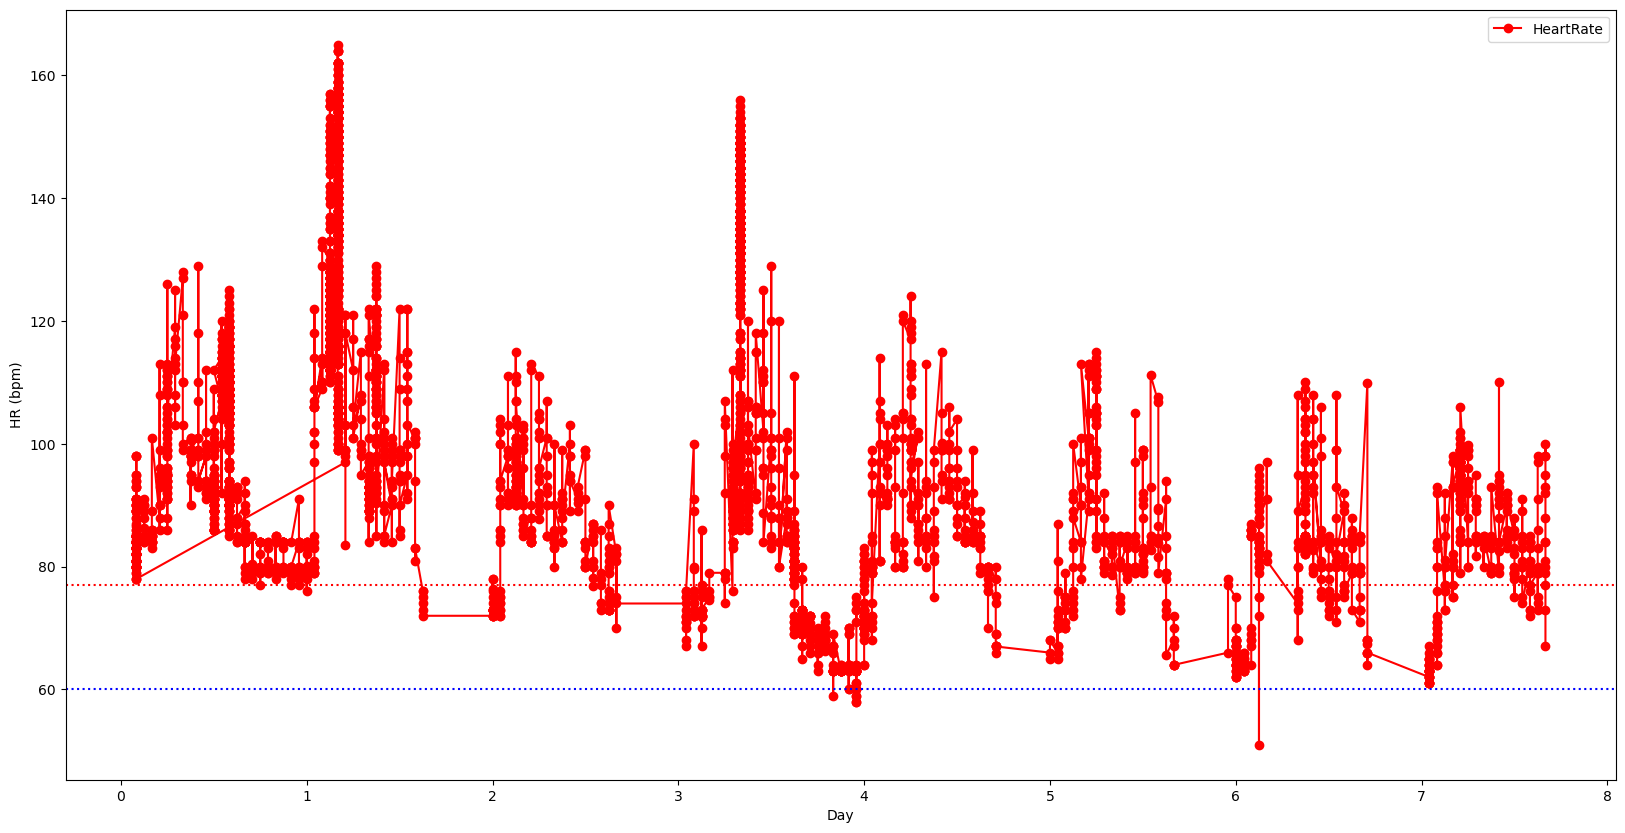

In [103]:
fig, ax = plt.subplots(1, figsize = (20, 10))
threshold_a = 77
threshold_b = 60
df.plot.line(ax = ax, y = 'HeartRate',color = 'r', marker = 'o')
ax.set_xlabel("Day")
ax.set_ylabel("HR (bpm)")
plt.axhline(threshold_a, color='red', ls='dotted')
plt.axhline(threshold_b, color='blue', ls='dotted')